##Load Data

In [38]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')
featurespath = '/content/drive/MyDrive/ML_Project/'
features = pd.read_csv(featurespath + 'features.csv', header=None)
image_names = pd.read_csv(featurespath + 'image_names.csv', header=None)
Extractedfeatures = pd.read_csv(featurespath + '/Extracted/hog_feature.csv', header=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
Extractedfeatures = Extractedfeatures.drop(0, axis=0)
Extractedfeatures

,0,1,2,3,4,5,6,7,8,9,...,792,793,794,795,796,797,798,799,800,801
1,0.389609,0.389609,0.202853,0.389609,0.389609,0.370699,0.389609,0.249916,0.389068,0.389068,...,0.413289,0.089428,0.413289,0.150869,0.380091,0.413289,0.413289,0.376220,fake,150400011_fake_dall.e_jungle_1.jpg
2,0.396726,0.396726,0.292393,0.356219,0.396726,0.312070,0.396726,0.246292,0.463806,0.463806,...,0.414781,0.209132,0.414781,0.414781,0.414781,0.309913,0.000000,0.414781,fake,150400011_fake_dall.e_jungle_2.jpg
3,0.418792,0.047710,0.268775,0.357347,0.418792,0.418792,0.418792,0.310225,0.386601,0.386601,...,0.382448,0.382448,0.090182,0.382448,0.382448,0.338034,0.382448,0.382448,fake,150400011_fake_dall.e_jungle_3.jpg
4,0.423086,0.261049,0.000000,0.191953,0.423086,0.423086,0.423086,0.423086,0.387195,0.387195,...,0.427290,0.427290,0.427290,0.271906,0.383158,0.127809,0.180597,0.427290,fake,150400011_fake_dall.e_jungle_4.jpg
5,0.442849,0.081291,0.113215,0.000000,0.442849,0.442849,0.442849,0.442849,0.493276,0.493276,...,0.418471,0.418471,0.418471,0.418471,0.290149,0.357932,0.115153,0.271968,fake,150400011_fake_dall.e_jungle_5.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,0.464709,0.369028,0.464709,0.464709,0.464709,0.000000,0.000000,0.000000,0.375929,0.375929,...,0.383246,0.266585,0.246145,0.187419,0.305567,0.455272,0.455272,0.422404,real,830401079_real_none_sea_5.jpeg.jpg
3414,0.151111,0.000000,0.000000,0.586551,0.783946,0.136210,0.000000,0.000000,0.405289,0.408285,...,0.382076,0.382076,0.382076,0.337017,0.382076,0.382076,0.102614,0.382076,real,830401079_real_none_sea_6.jpeg.jpg
3415,0.482440,0.430428,0.533978,0.108251,0.533978,0.000000,0.000000,0.000000,0.403025,0.000000,...,0.363686,0.363686,0.363686,0.363686,0.363686,0.356026,0.363686,0.282210,real,830401079_real_none_sea_7.jpeg.jpg
3416,0.457885,0.205680,0.345052,0.000000,0.457885,0.000000,0.457885,0.457885,0.427370,0.372354,...,0.543145,0.543145,0.543145,0.153735,0.097230,0.000000,0.286166,0.000000,real,830401079_real_none_sea_8.jpeg.jpg


In [3]:
features

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0.352045,-0.169915,0.937356,0.925292,-0.077977,-0.152347,-0.189743,-0.099706,-0.028559,-0.087839,...,0.773510,0.641536,-0.042117,0.834933,-0.106850,0.883555,0.468290,-0.122848,1.149696,-0.152059
1,0.018364,-0.165081,0.771506,0.676708,-0.061836,-0.189104,-0.131912,-0.062071,-0.071014,-0.129198,...,0.672470,-0.099349,0.085148,0.023044,-0.141916,0.404032,-0.005711,-0.149891,0.541796,-0.143684
2,0.138912,-0.199512,-0.131271,-0.090633,-0.079722,-0.098920,-0.114894,-0.027749,0.060971,-0.054870,...,-0.079147,0.479730,-0.086299,0.565859,-0.107982,0.684583,0.063522,-0.109546,0.308659,-0.138200
3,-0.145212,-0.086228,-0.085229,-0.088593,0.866469,-0.077595,0.959357,-0.188308,-0.148056,1.195884,...,-0.049440,-0.136822,-0.061490,-0.107132,0.113203,-0.058522,-0.005854,1.872197,-0.024115,0.917616
4,-0.190404,0.055668,-0.087970,-0.170925,0.000188,-0.073674,0.688444,0.094366,-0.175468,0.481301,...,-0.110446,-0.160544,-0.016855,-0.218392,-0.030111,-0.104411,-0.149175,1.520564,-0.190042,0.750496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417,-0.117779,0.495850,-0.180773,-0.185994,0.115343,-0.128339,0.001107,-0.181666,-0.212105,-0.240720,...,-0.187717,-0.216312,-0.134602,-0.211741,0.646618,-0.062861,-0.123637,0.024985,-0.115916,-0.088882
3418,0.447237,0.010549,-0.098766,0.083435,-0.114040,-0.209589,-0.174678,-0.061986,0.029102,-0.110844,...,0.126959,0.350087,0.115202,0.488496,-0.127007,0.728671,0.302269,-0.158372,0.258575,-0.065868
3419,0.722392,-0.137230,0.359047,0.097964,0.022285,-0.238017,-0.180530,-0.073098,0.667035,-0.148561,...,0.092261,0.551609,-0.049502,-0.007720,-0.122997,0.284874,-0.041074,-0.146567,0.120693,-0.122208
3420,1.060667,-0.141906,-0.054874,0.085021,0.037093,-0.183091,0.010124,-0.061185,-0.196237,0.036927,...,0.074805,1.205864,0.034566,0.611529,-0.124286,0.738641,0.688375,-0.149932,0.273168,-0.021088


In [4]:
image_names

,0
0,810101293_real_none_mountain_5.jpeg
1,810199494_real_none_mountain_8.jpeg
2,810199515_real_none_sea_3.jpeg
3,810698270_fake_dreamstudio_mountain_3.jpeg
4,810198346_fake_stable_jungle_1.jpg
...,...
3417,810701006_fake_delle_sea_3.jpg
3418,810701006_real_none_sea_9.jpeg
3419,810198346_real_none_mountain_2.jpg
3420,810101229_real_none_jungle_4.jpeg


In [5]:
import re
to_be_removed = [i for i in range(image_names.shape[0]) if image_names.iloc[i,0]=='desktop.ini']
image_names = image_names.drop(to_be_removed, axis=0)
features = features.drop(to_be_removed, axis=0)

In [6]:
def Name2Label(image_names):
  labels = [re.split('_|-', str(image_names.iloc[i,0]))[1] for i in range(image_names.shape[0])]
  labels = [l.lower() for l in labels]
  labels = np.array(labels)
  return labels

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
def score(model, X_train, y_train, X_test, y_test):
  trainpred = model.predict(X_train)
  pred = model.predict(X_test)
  print("Metrics on train data:")
  print(classification_report(y_train, trainpred, digits=4))
  print("Metrics on test data:")
  print(classification_report(y_test, pred, digits=4))

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def cmdisp(model, y_test):
  pred = model.predict(X_test)
  cm = confusion_matrix(y_test, pred, labels=model.classes_)
  cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  cmd.plot()


In [9]:
def MisclassifiedPics(model, X, y, names):
  print("misclassified sample names:")
  eq = (model.predict(X) == y)
  for i in range(eq.shape[0]):
    if not eq[i]:
      print('\t' + names[i][0])

##Gaussian Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
def nb(X_train, y_train, X_test, y_test, train_names, test_names, err=0):
  nbmodel = GaussianNB().fit(X_train, y_train)
  score(nbmodel, X_train, y_train, X_test, y_test)
  cmdisp(nbmodel, y_test)
  if err:
    print("Train ", end="")
    MisclassifiedPics(nbmodel, X_train, y_train, train_names.to_numpy())
    print("Test ", end="")
    MisclassifiedPics(nbmodel, X_test, y_test, test_names.to_numpy())

##Mulit-Layer Perceptron

In [11]:
from sklearn.neural_network import MLPClassifier
def mlp(X_train, y_train, X_test, y_test, train_names, test_names, layers, err=0):
  mlpmodel = MLPClassifier(hidden_layer_sizes=layers).fit(X_train, y_train)
  score(mlpmodel, X_train, y_train, X_test, y_test)
  cmdisp(mlpmodel, y_test)
  if err:
    print("Train ", end="")
    MisclassifiedPics(mlpmodel, X_train, y_train, train_names.to_numpy())
    print("Test ", end="")
    MisclassifiedPics(mlpmodel, X_test, y_test, test_names.to_numpy())

##Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
def lr(X_train, y_train, X_test, y_test, train_names, test_names, err=0):
  lrmodel = LogisticRegression(C=4, max_iter=10000).fit(X_train, y_train)
  score(lrmodel, X_train, y_train, X_test, y_test)
  cmdisp(lrmodel, y_test)
  if err:
    print("Train ", end="")
    MisclassifiedPics(lrmodel, X_train, y_train, train_names.to_numpy())
    print("Test ", end="")
    MisclassifiedPics(lrmodel, X_test, y_test, test_names.to_numpy())

##Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
def dt(X_train, y_train, X_test, y_test, train_names, test_names, err=0):
  dtmodel = DecisionTreeClassifier(criterion='entropy', max_depth=30).fit(X_train, y_train)
  score(dtmodel, X_train, y_train, X_test, y_test)
  cmdisp(dtmodel, y_test)
  if err:
    print("Train ", end="")
    MisclassifiedPics(dtmodel, X_train, y_train, train_names.to_numpy())
    print("Test ", end="")
    MisclassifiedPics(dtmodel, X_test, y_test, test_names.to_numpy())

##Support Vector Machine

In [14]:
from sklearn.svm import SVC
def svm(X_train, y_train, X_test, y_test, train_names, test_names, err=0):
  svmmodel = SVC(kernel='rbf').fit(X_train, y_train)
  score(svmmodel, X_train, y_train, X_test, y_test)
  cmdisp(svmmodel, y_test)
  if err:
    print("Train ", end="")
    MisclassifiedPics(svmmodel, X_train, y_train, train_names.to_numpy())
    print("Test ", end="")
    MisclassifiedPics(svmmodel, X_test, y_test, test_names.to_numpy())

##K-Nearest-Neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier
def knn(X_train, y_train, X_test, y_test, train_names, test_names, err=0):
  knnmodel = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
  score(knnmodel, X_train, y_train, X_test, y_test)
  cmdisp(knnmodel, y_test)
  if err:
    print("Train ", end="")
    MisclassifiedPics(knnmodel, X_train, y_train, train_names.to_numpy())
    print("Test ", end="")
    MisclassifiedPics(knnmodel, X_test, y_test, test_names.to_numpy())

##Given Features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_names, test_names = train_test_split(features, image_names, train_size=0.7)

In [ ]:
y_train = Name2Label(train_names)
y_test = Name2Label(test_names)

Metrics on train data:
              precision    recall  f1-score   support

        fake     0.9949    0.9983    0.9966      1183
        real     0.9983    0.9950    0.9967      1211

    accuracy                         0.9967      2394
   macro avg     0.9966    0.9967    0.9967      2394
weighted avg     0.9967    0.9967    0.9967      2394

Metrics on test data:
              precision    recall  f1-score   support

        fake     0.9925    0.9981    0.9953       527
        real     0.9980    0.9920    0.9950       499

    accuracy                         0.9951      1026
   macro avg     0.9952    0.9950    0.9951      1026
weighted avg     0.9951    0.9951    0.9951      1026

Train misclassified sample names:
	810199436_real_none_sea_5.jpeg
	810100402_fake_stable_jungle_5.jpeg
	810101224_real_none_sea_1.jpeg
	810199427_real_none_sea_1.jpeg
	810199584_real_none_sea_9.jpeg
	810100402_real_none_sea_8.jpeg
	810198429_fake_stable_jungle_5.jpg
	150400011_real_none_mountain_8.jp

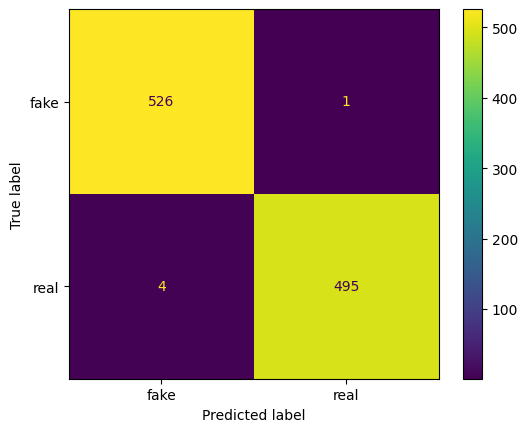

In [ ]:
nb(X_train, y_train, X_test, y_test, train_names, test_names, 1)

Metrics on train data:
              precision    recall  f1-score   support

        fake     1.0000    1.0000    1.0000      1183
        real     1.0000    1.0000    1.0000      1211

    accuracy                         1.0000      2394
   macro avg     1.0000    1.0000    1.0000      2394
weighted avg     1.0000    1.0000    1.0000      2394

Metrics on test data:
              precision    recall  f1-score   support

        fake     0.9943    0.9981    0.9962       527
        real     0.9980    0.9940    0.9960       499

    accuracy                         0.9961      1026
   macro avg     0.9962    0.9960    0.9961      1026
weighted avg     0.9961    0.9961    0.9961      1026

Train misclassified sample names:
Test misclassified sample names:
	810197636_real_none_mountain_3.jpeg
	810198429_real_none_mountain_8.jpg
	810197238_real_none_mountain_8.jpeg
	810199570_fake_stable_jungle_1.jpeg


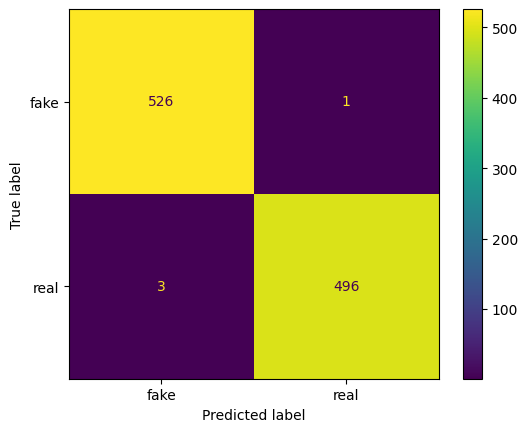

In [ ]:
lr(X_train, y_train, X_test, y_test, train_names, test_names, 1)

Metrics on train data:
              precision    recall  f1-score   support

        fake     0.9983    0.9958    0.9970      1183
        real     0.9959    0.9983    0.9971      1211

    accuracy                         0.9971      2394
   macro avg     0.9971    0.9971    0.9971      2394
weighted avg     0.9971    0.9971    0.9971      2394

Metrics on test data:
              precision    recall  f1-score   support

        fake     0.9943    0.9981    0.9962       527
        real     0.9980    0.9940    0.9960       499

    accuracy                         0.9961      1026
   macro avg     0.9962    0.9960    0.9961      1026
weighted avg     0.9961    0.9961    0.9961      1026

Train misclassified sample names:
	810100281_fake_stable_jungle_2.jpeg
	810199436_fake_stable_jungle_4.jpeg
	810199436_real_none_sea_5.jpeg
	810199424_fake_stable_jungle_1.jpeg
	810100402_fake_stable_jungle_5.jpeg
	810199427_real_none_sea_1.jpeg
	810198429_fake_stable_jungle_5.jpg
Test misclassified 

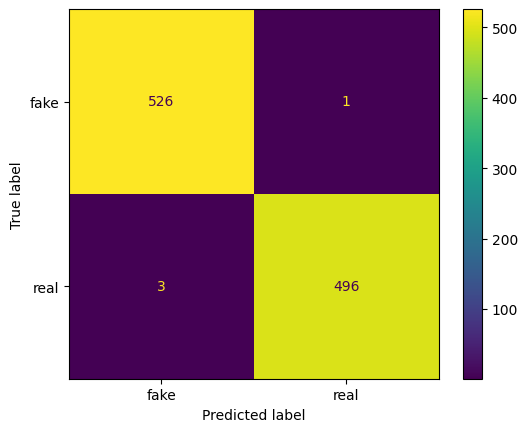

In [ ]:
svm(X_train, y_train, X_test, y_test, train_names, test_names, 1)

Metrics on train data:
              precision    recall  f1-score   support

        fake     1.0000    1.0000    1.0000      1183
        real     1.0000    1.0000    1.0000      1211

    accuracy                         1.0000      2394
   macro avg     1.0000    1.0000    1.0000      2394
weighted avg     1.0000    1.0000    1.0000      2394

Metrics on test data:
              precision    recall  f1-score   support

        fake     0.9925    1.0000    0.9962       527
        real     1.0000    0.9920    0.9960       499

    accuracy                         0.9961      1026
   macro avg     0.9962    0.9960    0.9961      1026
weighted avg     0.9961    0.9961    0.9961      1026

Train misclassified sample names:
Test misclassified sample names:
	810197636_real_none_mountain_3.jpeg
	810198429_real_none_mountain_8.jpg
	810197238_real_none_mountain_8.jpeg
	810100469_real_none_mountain_ (7).jpg


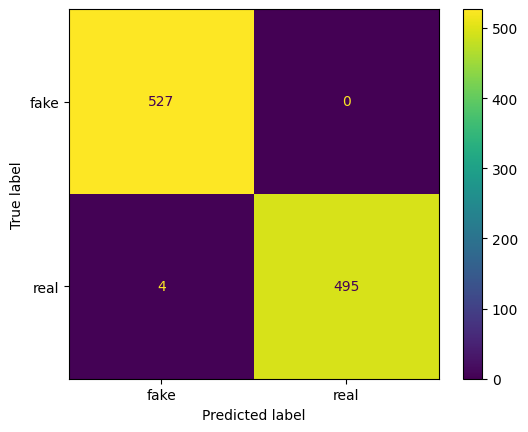

In [ ]:
mlp(X_train, y_train, X_test, y_test, train_names, test_names, [640,320], 1)

Metrics on train data:
              precision    recall  f1-score   support

        fake     1.0000    0.9958    0.9979      1183
        real     0.9959    1.0000    0.9979      1211

    accuracy                         0.9979      2394
   macro avg     0.9979    0.9979    0.9979      2394
weighted avg     0.9979    0.9979    0.9979      2394

Metrics on test data:
              precision    recall  f1-score   support

        fake     0.9943    0.9962    0.9953       527
        real     0.9960    0.9940    0.9950       499

    accuracy                         0.9951      1026
   macro avg     0.9952    0.9951    0.9951      1026
weighted avg     0.9951    0.9951    0.9951      1026

Train misclassified sample names:
	810199424_fake_stable_jungle_1.jpeg
	810100402_fake_stable_jungle_5.jpeg
	810101293_fake_stable_sea_2.jpeg
	810198429_fake_stable_jungle_5.jpg
	810199228_fake_dreamstudio_jungle_2.jpg
Test misclassified sample names:
	810197636_real_none_mountain_3.jpeg
	810198429_r

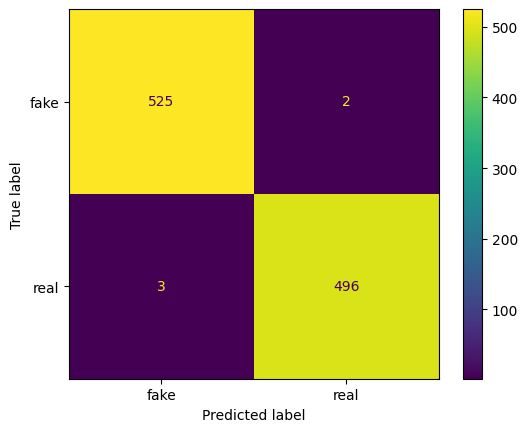

In [ ]:
knn(X_train, y_train, X_test, y_test, train_names, test_names, 1)

Metrics on train data:
              precision    recall  f1-score   support

        fake     1.0000    1.0000    1.0000      1183
        real     1.0000    1.0000    1.0000      1211

    accuracy                         1.0000      2394
   macro avg     1.0000    1.0000    1.0000      2394
weighted avg     1.0000    1.0000    1.0000      2394

Metrics on test data:
              precision    recall  f1-score   support

        fake     0.9887    0.9943    0.9915       527
        real     0.9940    0.9880    0.9910       499

    accuracy                         0.9912      1026
   macro avg     0.9913    0.9911    0.9912      1026
weighted avg     0.9912    0.9912    0.9912      1026

Train misclassified sample names:
Test misclassified sample names:
	810197636_real_none_mountain_3.jpeg
	810198375_fake_stable_sea_1.jpg
	810198429_real_none_mountain_8.jpg
	810199515_real_none_jungle_7.jpeg
	810199460_real_none_jungle_10.jpg
	810197238_real_none_mountain_8.jpeg
	810199570_fake_stabl

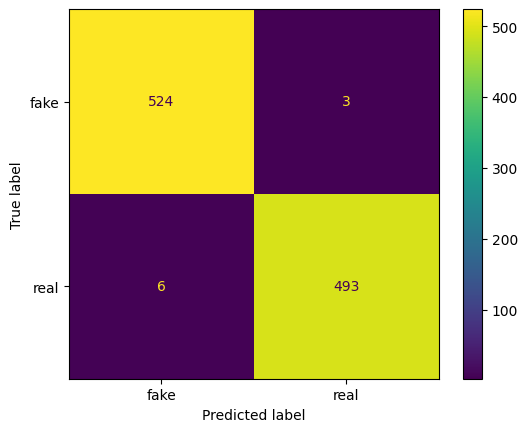

In [ ]:
dt(X_train, y_train, X_test, y_test, train_names, test_names, 1)

##Extracted Features

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_names_labels, test_names_labels = train_test_split(Extractedfeatures.drop([800, 801], axis=1), Extractedfeatures[[800, 801]], train_size=0.7)

In [27]:
y_train = train_names_labels[800]
y_test = test_names_labels[800]
train_names = train_names_labels[801]
test_names = test_names_labels[801]

Metrics on train data:
              precision    recall  f1-score   support

        fake     0.6298    0.5258    0.5731      1181
        real     0.6014    0.6983    0.6463      1210

    accuracy                         0.6131      2391
   macro avg     0.6156    0.6121    0.6097      2391
weighted avg     0.6154    0.6131    0.6102      2391

Metrics on test data:
              precision    recall  f1-score   support

        fake     0.6106    0.5009    0.5504       529
        real     0.5541    0.6600    0.6024       497

    accuracy                         0.5780      1026
   macro avg     0.5823    0.5805    0.5764      1026
weighted avg     0.5832    0.5780    0.5756      1026



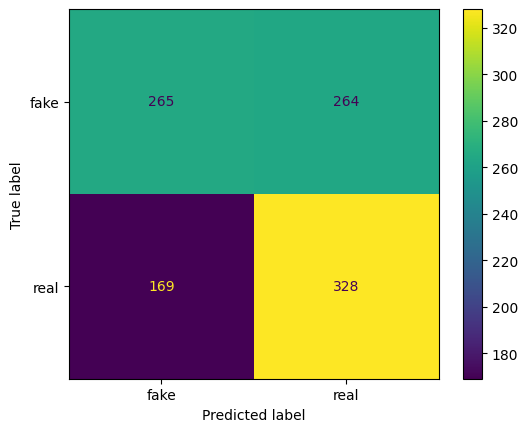

In [28]:
nb(X_train, y_train, X_test, y_test, train_names, test_names)

Metrics on train data:
              precision    recall  f1-score   support

        fake     0.8108    0.7909    0.8007      1181
        real     0.8006    0.8198    0.8101      1210

    accuracy                         0.8055      2391
   macro avg     0.8057    0.8053    0.8054      2391
weighted avg     0.8056    0.8055    0.8055      2391

Metrics on test data:
              precision    recall  f1-score   support

        fake     0.5812    0.5482    0.5642       529
        real     0.5465    0.5795    0.5625       497

    accuracy                         0.5634      1026
   macro avg     0.5638    0.5638    0.5634      1026
weighted avg     0.5644    0.5634    0.5634      1026



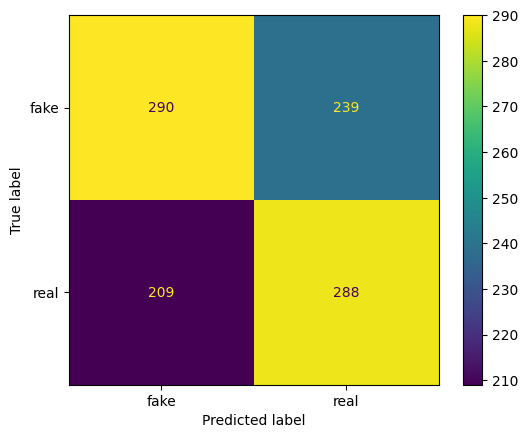

In [29]:
lr(X_train, y_train, X_test, y_test, train_names, test_names)

Metrics on train data:
              precision    recall  f1-score   support

        fake     0.9516    0.8654    0.9064      1181
        real     0.8793    0.9570    0.9165      1210

    accuracy                         0.9118      2391
   macro avg     0.9154    0.9112    0.9115      2391
weighted avg     0.9150    0.9118    0.9115      2391

Metrics on test data:
              precision    recall  f1-score   support

        fake     0.6474    0.5936    0.6193       529
        real     0.6026    0.6559    0.6281       497

    accuracy                         0.6238      1026
   macro avg     0.6250    0.6248    0.6237      1026
weighted avg     0.6257    0.6238    0.6236      1026



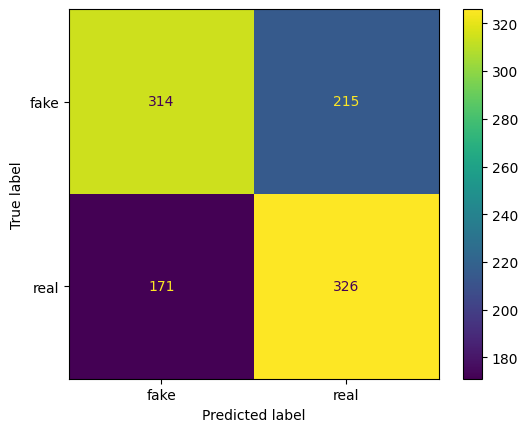

In [30]:
svm(X_train, y_train, X_test, y_test, train_names, test_names)

Metrics on train data:
              precision    recall  f1-score   support

        fake     1.0000    1.0000    1.0000      1181
        real     1.0000    1.0000    1.0000      1210

    accuracy                         1.0000      2391
   macro avg     1.0000    1.0000    1.0000      2391
weighted avg     1.0000    1.0000    1.0000      2391

Metrics on test data:
              precision    recall  f1-score   support

        fake     0.6430    0.5992    0.6204       529
        real     0.6023    0.6459    0.6233       497

    accuracy                         0.6218      1026
   macro avg     0.6226    0.6226    0.6218      1026
weighted avg     0.6233    0.6218    0.6218      1026



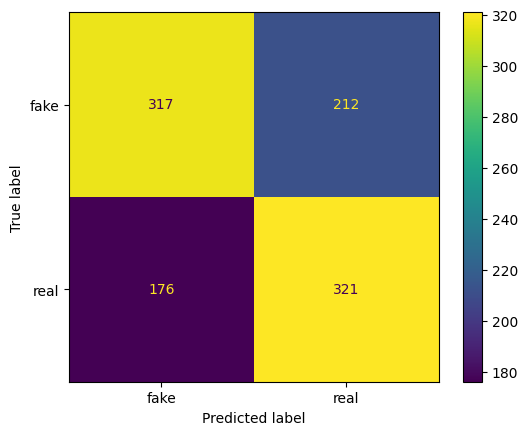

In [41]:
mlp(X_train, y_train, X_test, y_test, train_names, test_names, [400,200,100])

Metrics on train data:
              precision    recall  f1-score   support

        fake     0.7483    0.5614    0.6415      1181
        real     0.6558    0.8157    0.7271      1210

    accuracy                         0.6901      2391
   macro avg     0.7021    0.6885    0.6843      2391
weighted avg     0.7015    0.6901    0.6848      2391

Metrics on test data:
              precision    recall  f1-score   support

        fake     0.5913    0.4102    0.4844       529
        real     0.5266    0.6982    0.6003       497

    accuracy                         0.5497      1026
   macro avg     0.5589    0.5542    0.5424      1026
weighted avg     0.5599    0.5497    0.5406      1026



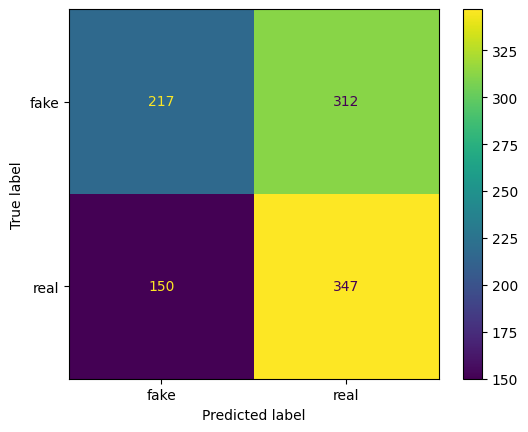

In [32]:
knn(X_train, y_train, X_test, y_test, train_names, test_names)

Metrics on train data:
              precision    recall  f1-score   support

        fake     1.0000    1.0000    1.0000      1181
        real     1.0000    1.0000    1.0000      1210

    accuracy                         1.0000      2391
   macro avg     1.0000    1.0000    1.0000      2391
weighted avg     1.0000    1.0000    1.0000      2391

Metrics on test data:
              precision    recall  f1-score   support

        fake     0.5690    0.5142    0.5402       529
        real     0.5310    0.5855    0.5569       497

    accuracy                         0.5487      1026
   macro avg     0.5500    0.5498    0.5486      1026
weighted avg     0.5506    0.5487    0.5483      1026



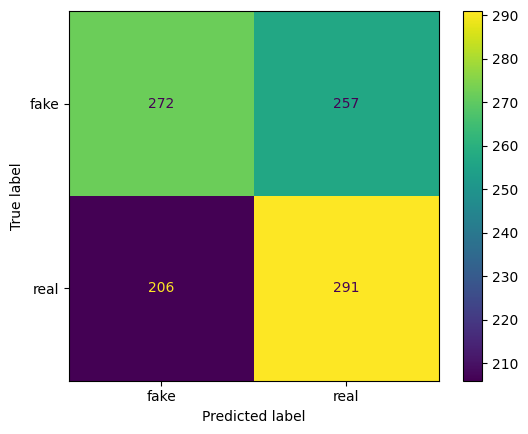

In [33]:
dt(X_train, y_train, X_test, y_test, train_names, test_names)

In [34]:
from sklearn.ensemble import AdaBoostClassifier
abmodel = AdaBoostClassifier(n_estimators=1000, random_state=0, estimator=DecisionTreeClassifier()).fit(X_train, y_train)
score(abmodel, X_train, y_train, X_test, y_test)

Metrics on train data:
              precision    recall  f1-score   support

        fake     1.0000    1.0000    1.0000      1181
        real     1.0000    1.0000    1.0000      1210

    accuracy                         1.0000      2391
   macro avg     1.0000    1.0000    1.0000      2391
weighted avg     1.0000    1.0000    1.0000      2391

Metrics on test data:
              precision    recall  f1-score   support

        fake     0.5876    0.5388    0.5621       529
        real     0.5490    0.5976    0.5723       497

    accuracy                         0.5673      1026
   macro avg     0.5683    0.5682    0.5672      1026
weighted avg     0.5689    0.5673    0.5670      1026

